In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import *
import pandas as pd
import numpy as np
import itertools #스피어만 상관계수

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
df=pd.read_csv("당기순익_증가율.csv",index_col='결산년도',encoding='euc-kr')
df

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,...,LG 화학전체대비증가율,NAVER전체대비증가율,SK 텔레콤전체대비증가율,삼성물산전체대비증가율,삼성바이오로직스전체대비증가율,삼성전자전체대비증가율,포스코 케미칼전체대비증가율,한국전력전체대비증가율,현대 모비스전체대비증가율,현대차전체대비증가율
결산년도,,,,,,,,,,,,,,,,,,,,,
16년09월(3Q),5774.0,1921.0,2974.0,1980.0,3221.0,1446.0,0.0,45379.0,183.0,29382.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16년12월(4Q),4631.0,671.0,2700.0,1828.0,4747.0,2583.0,-570.0,70880.0,221.0,2795.0,...,-7.079360,-5.542947,49.510412,80.764526,2.133821,58.329418,22.898848,-88.353552,0.943682,-2.335253
17년03월(1Q),8876.0,1805.0,5481.0,2109.0,5835.0,1876.0,-331.0,76844.0,230.0,9000.0,...,79.649591,-7.978417,-0.430670,-50.721682,-65.280233,-14.936187,-19.278011,198.653169,-14.101771,8.170924
17년06월(2Q),10047.0,1682.0,5903.0,1714.0,6205.0,1097.0,-221.0,110539.0,176.0,3589.0,...,-8.258576,-34.687157,-9.616856,-57.482422,-49.190530,27.890675,-39.436162,-76.080124,-52.668756,-50.965371
17년09월(3Q),8974.0,1876.0,5455.0,2158.0,7930.0,1314.0,-317.0,111934.0,303.0,15292.0,...,-16.926806,16.566873,18.462716,10.443777,34.101469,-8.075447,62.821646,316.742243,-9.337445,-6.535343
17년12월(4Q),5537.0,820.0,3381.0,1720.0,6606.0,524.0,-101.0,122551.0,330.0,-13468.0,...,-20.258995,-2.535401,1.065079,-42.360595,-50.377631,27.246224,26.672061,-170.311024,-117.203575,54.888513
18년03월(1Q),9684.0,1964.0,5527.0,1538.0,6934.0,3759.0,-467.0,116885.0,315.0,-2505.0,...,51.598276,-22.455465,-6.908887,605.492342,350.502168,-16.497451,-16.419524,-93.274426,-388.208589,-55.068417
18년06월(2Q),9468.0,1874.0,4934.0,2818.0,9143.0,3321.0,-195.0,110434.0,321.0,-9186.0,...,-4.919073,89.035043,37.667589,-5.841960,-52.434036,0.290975,7.714837,272.516662,24.483610,16.621994
18년09월(3Q),9540.0,2072.0,3466.0,684.0,10498.0,2357.0,-270.0,131507.0,372.0,7373.0,...,-49.256994,-95.231724,-4.684176,-48.531659,18.957281,-0.422272,-3.616407,-199.767702,-38.187564,-81.759099


In [8]:
df.index=['16-3','16-4','17-1','17-2','17-3','17-4','18-1','18-2','18-3','18-4','19-1','19-2','19-3','19-4','20-1','20-2','20-3','20-4','21-1']
df.index.name='분기'

In [41]:
list1,list2,list3=[],[],[]
for i in range(1,19):
    l=list(df.iloc[i,26:])
    l.sort(reverse=True)
    print(l[0:3])
    for x in range(3):
        for n in range(1,19):
            for a in range(26,38):
                if df.iloc[n,a] == l[x]:
                    print(df.columns[a])
                    if x==0:
                        list1.append(df.columns[a][:-7])
                    elif x==1:
                        list2.append(df.columns[a][:-7])
                    else:
                        list3.append(df.columns[a][:-7])
list1
list2
list3

[80.76452618220237, 58.32941787036238, 49.51041190878146]
삼성물산전체대비증가율
삼성전자전체대비증가율
SK 텔레콤전체대비증가율
[198.6531691183413, 145.65108161377572, 79.64959130081]
한국전력전체대비증가율
LG 생활건강전체대비증가율
LG 화학전체대비증가율
[27.890674971416654, -2.765021689527716, -8.258576424352983]
삼성전자전체대비증가율
KB 금융전체대비증가율
LG 화학전체대비증가율
[316.74224312674204, 62.82164610047491, 34.101469218533325]
한국전력전체대비증가율
포스코 케미칼전체대비증가율
삼성바이오로직스전체대비증가율
[54.88851262241117, 27.246223895685528, 26.672061292440013]
현대차전체대비증가율
삼성전자전체대비증가율
포스코 케미칼전체대비증가율
[605.4923423468168, 350.50216775683884, 127.63812525502765]
삼성물산전체대비증가율
삼성바이오로직스전체대비증가율
LG 생활건강전체대비증가율
[272.516662079064, 89.03504274296381, 37.66758895332246]
한국전력전체대비증가율
NAVER전체대비증가율
SK 텔레콤전체대비증가율
[18.95728105200842, -0.4222717891595096, -3.6164069422403298]
삼성바이오로직스전체대비증가율
삼성전자전체대비증가율
포스코 케미칼전체대비증가율
[283.6509768358753, 123.5713831408472, 35.656719554241285]
삼성물산전체대비증가율
NAVER전체대비증가율
현대 모비스전체대비증가율
[362.7212305654028, 146.87868777110629, 91.35398442799485]
KB 금융전체대비증가율
LG 생활건강전체대비증가율
LG 화학전체대비증가율
[25.93

['삼성물산',
 '한국전력',
 '삼성전자',
 '한국전력',
 '현대차',
 '삼성물산',
 '한국전력',
 '삼성바이오로직스',
 '삼성물산',
 'KB 금융',
 '현대 모비스',
 'NAVER',
 '삼성바이오로직스',
 'LG 생활건강',
 'LG 화학',
 '한국전력',
 '포스코 케미칼',
 '삼성물산']

['삼성전자',
 'LG 생활건강',
 'KB 금융',
 '포스코 케미칼',
 '삼성전자',
 '삼성바이오로직스',
 'NAVER',
 '삼성전자',
 'NAVER',
 'LG 생활건강',
 'KB 금융',
 'LG 화학',
 'NAVER',
 'KB 금융',
 '한국전력',
 'NAVER',
 '삼성바이오로직스',
 '포스코 케미칼']

['SK 텔레콤',
 'LG 화학',
 'LG 화학',
 '삼성바이오로직스',
 '포스코 케미칼',
 'LG 생활건강',
 'SK 텔레콤',
 '포스코 케미칼',
 '현대 모비스',
 'LG 화학',
 '현대차',
 '포스코 케미칼',
 '현대차',
 '삼성물산',
 '삼성바이오로직스',
 '삼성전자',
 'NAVER',
 'KB 금융']

In [86]:
df1=pd.DataFrame({'1st':list1,'2nd':list2,'3rd':list3},index=df.index[1:])
df1

,1st,2nd,3rd
분기,,,
16-4,삼성물산,삼성전자,SK 텔레콤
17-1,한국전력,LG 생활건강,LG 화학
17-2,삼성전자,KB 금융,LG 화학
17-3,한국전력,포스코 케미칼,삼성바이오로직스
17-4,현대차,삼성전자,포스코 케미칼
18-1,삼성물산,삼성바이오로직스,LG 생활건강
18-2,한국전력,NAVER,SK 텔레콤
18-3,삼성바이오로직스,삼성전자,포스코 케미칼
18-4,삼성물산,NAVER,현대 모비스


([<matplotlib.axis.YTick at 0x1a75e914760>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, '증가율 1위')

Text(0.5, 0, '분기')

Text(0.5, 1.0, '증가율 1,2위')

Text(0.5, 0, '분기')

Text(0.5, 1.0, '증가율 1,2,3위')

Text(0.5, 0, '분기')

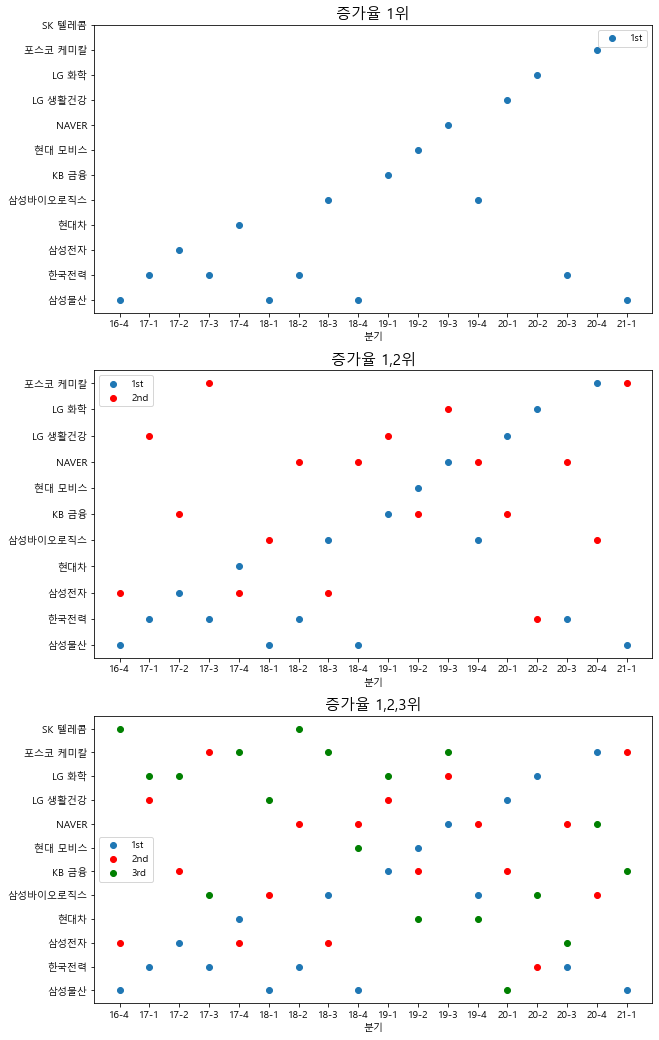

In [85]:
do = plt.figure(figsize=(10, 18)) # 차트 생성 및 사이즈 설정
do1=do.add_subplot(3,1,1)
do1.scatter(df1.index,df1['1st'],label='1st')
# plt.yticks(['KB 금융','현대차','삼성전자','NAVER','포스코 케미칼','삼성물산','LG 화학','삼성바이오로직스','LG 생활건강','SK 텔레콤','한국전력','현대 모비스'])
do1.set_title('증가율 1위', fontsize=15) # 타이틀 설정
do1.set_xlabel('분기',fontsize=10)
do1.legend(loc='best')


do2=do.add_subplot(3,1,2)
do2.scatter(df1.index,df1['1st'],label='1st')
do2.scatter(df1.index,df1['2nd'],c='r',label='2nd')
do2.set_title('증가율 1,2위', fontsize=15) # 타이틀 설정
do2.set_xlabel('분기',fontsize=10)
do2.legend(loc='best')

do3=do.add_subplot(3,1,3)
do3.scatter(df1.index,df1['1st'],label='1st')
do3.scatter(df1.index,df1['2nd'],c='r',label='2nd')
do3.scatter(df1.index,df1['3rd'],c='g',label='3rd')
do3.set_title('증가율 1,2,3위', fontsize=15) # 타이틀 설정
do3.set_xlabel('분기',fontsize=10)
do3.legend(loc='best')
# plt.scatter(df1.index,df1['1st'])
# plt.scatter(df1.index,df1['2nd'],c='r')
# plt.scatter(df1.index,df1['3rd'],c='g')

In [76]:
do.savefig('호황업종_시각화.png')

In [94]:
for i in range(12):
    pearsonr(df[df.columns[12]],df[df.columns[i+26]])

(-0.23126882831200352, 0.34077181139293267)

(-0.013805273394083814, 0.955267865681899)

(-0.190225574377842, 0.4353641418939234)

(-0.2729502844123211, 0.25821225703984535)

(0.34289328631372135, 0.15066989118210095)

(0.1570030229885543, 0.520938136743436)

(0.14507374897262976, 0.5534619866199403)

(0.012821776856612614, 0.9584518922926091)

(0.06017670918436224, 0.8066749139786779)

(0.3491638165841762, 0.1428591357218111)

(-0.3784771886038991, 0.11007694689410673)

(0.19699758583836635, 0.41888071139250893)

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, '전체합')

Text(16-4, 216296.0, '삼성물산')

Text(17-1, 266802.0, '한국전력')

Text(17-2, 309378.0, '삼성전자')

Text(17-3, 338266.0, '한국전력')

Text(17-4, 278186.0, '현대차')

Text(18-1, 311218.0, '삼성물산')

Text(18-2, 293136.0, '한국전력')

Text(18-3, 350310.0, '삼성바이오로직스')

Text(18-4, 202182.0, '삼성물산')

Text(19-1, 153706.0, 'KB 금융')

Text(19-2, 164088.0, '현대 모비스')

Text(19-3, 190846.0, 'NAVER')

Text(19-4, 129148.0, '삼성바이오로직스')

Text(20-1, 153756.0, 'LG 생활건강')

Text(20-2, 175492.0, 'LG 화학')

Text(20-3, 276564.0, '한국전력')

Text(20-4, 208716.0, '포스코 케미칼')

Text(21-1, 284003.0, '삼성물산')

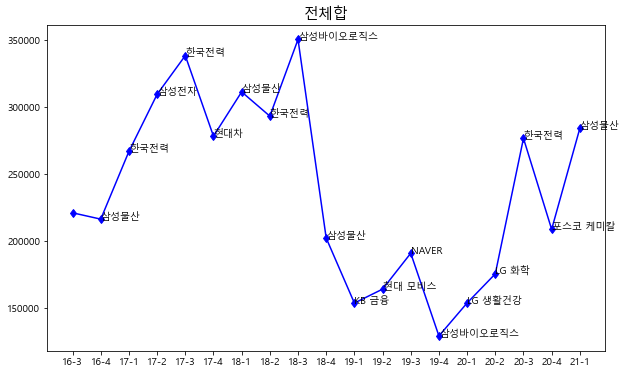

In [113]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df[df.columns[12]],color='b',marker='d')
plt.title('전체합', fontsize=15)
for  n in range(18):
    plt.text(df.index[n+1],
             df[df.columns[12]][n+1],
            df1['1st'][n],
            fontsize=10)
plt.savefig('호황업종on전체합.png')

In [111]:
plt.savefig('호황업종on전체합.png')

<Figure size 432x288 with 0 Axes>